# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Импортируем необходимые библиотеки, считаем данные из файла real_estate_data.csv в переменную data, а также выведем первые 20 записей из файла на экран

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Выведем основную информацию о датафрейме на экран

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 23699 entries, 0 to 23698

Data columns (total 22 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   total_images          23699 non-null  int64  

 1   last_price            23699 non-null  float64

 2   total_area            23699 non-null  float64

 3   first_day_exposition  23699 non-null  object 

 4   rooms                 23699 non-null  int64  

 5   ceiling_height        14504 non-null  float64

 6   floors_total          23613 non-null  float64

 7   living_area           21796 non-null  float64

 8   floor                 23699 non-null  int64  

 9   is_apartment          2775 non-null   object 

 10  studio                23699 non-null  bool   

 11  open_plan             23699 non-null  bool   

 12  kitchen_area          21421 non-null  float64

 13  balcony               12180 non-null  float64

 14  locality_name         23650 non-null  object 

 15 

In [3]:
display(data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Построим гистограммы для всех возможных столбцов, дабы увидеть распределение значений.

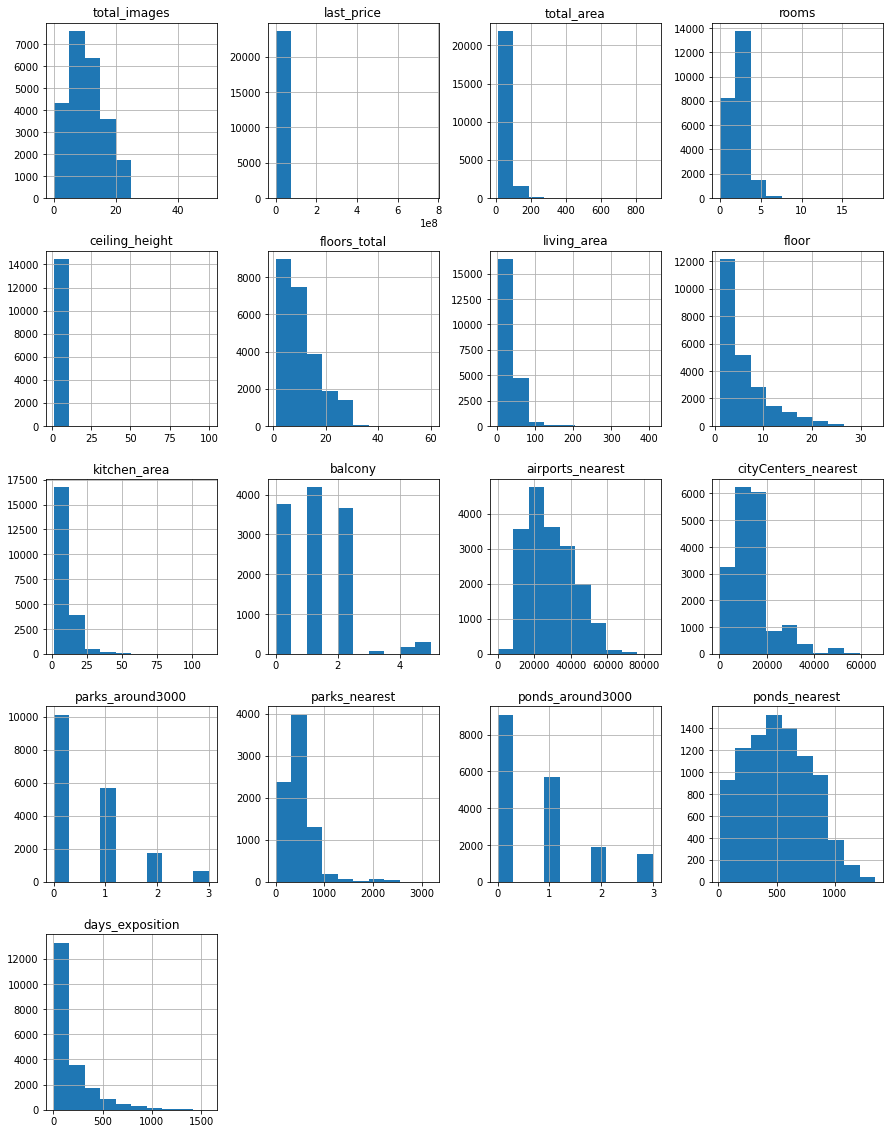

In [4]:
data.hist(figsize=(15,20))
plt.show()

#### Вывод:
Исходя из полученной инфомрации может сделать вывод, что в столбцах: ceiling_height,floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition имеются пропущенные значения.
Также first_day_exposition (to datetime), floors_total (to int), balcony (to int), parks_around3000 (to int), ponds_around3000 (to int), days_exposition (to in) имеют неверный тип данных.
Ceiling_height имеет аномально высокое максимальное значение, что не соответствует действительности.


### Предобработка данных

#### Выведем количество пропущенных значений для каждого столбца

In [5]:
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Переходим к пропущенным значениям в столбце ceiling_height

Выше, в функции describe мы обнаружили аномально высокие значения в данном столбце. Заменим пустые значения на медианные, а позже определим чем являются такие выбросы в нашем датасете.

In [6]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print(data['ceiling_height'].isna().sum())

0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

#### Переходим к пропущенным значениям в столбце locality_name

Местоположение является одним из ключевых криетериев. Заменим отсутствующие значения на 'unknown'. Также приведем все строки к нижнему регистру и заменим все буквы ё на е.

In [7]:
data['locality_name'] = data['locality_name'].fillna('unknown')
print(data['locality_name'].isna().sum())

0


#### Переходим к пропущенным значениям в столбце cityCenters_nearest.

Заполнить данные пропуски не представляется возможным. Количество пропущенных значений черезчур велико. Не будем никак обрабатывать данные значения

In [8]:
print(data['cityCenters_nearest'].isna().sum())

5519


#### Переходим к пропущенным значениям в столбце floors_total

Количество данных пропусков весьма незначительно. Заменим их на медианное по всему столбцу, так как это менее процента от общего количества данных.

In [9]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
print(data['floors_total'].isna().sum())

0


#### Переходим к пропущенным значениям в столбце living_area

Пропущенные в данном столбце значения вполне могут иметь высокую линейную корреляцию с total_area. Провери это,
дабы открыть возможность для замены пропущенных значений на медианные по отношению к total_area.

In [10]:
print(data['living_area'].corr(data['total_area']))

0.9395373338721493


Получаем явную положительную линейную зависимость. С ростом total_area - будет расти и living_area. Визуализируем данную зависимость для более детального понимания.

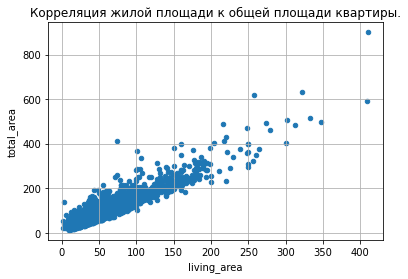

In [11]:
data.plot(x='living_area', y='total_area', kind='scatter', grid=True)
plt.title('Корреляция жилой площади к общей площади квартиры.')
plt.show()

Заменим пропуски на медианное значение отношения living_area к total_area.

In [12]:
data['living_area'] = data['living_area'].fillna(round((data['living_area'] / data['total_area']).mean() * data['total_area']))
print(data['living_area'].isna().sum())

0


#### Переходим к пропущенным значениям в столбце kitchen_area

Вероятно имеет место быть быть подобная living_area корреляция с total_area. Проверим это и при наличии таковой заменим на медианные значения отношения.

In [13]:
print(data['kitchen_area'].corr(data['total_area']))

0.6091211711198318


Зависимость меньше, однако все же заменим на медианные значения.

In [14]:
data['kitchen_area'] = data['kitchen_area'].fillna(round((data['kitchen_area'] / data['total_area']).mean() * data['total_area']))
print(data['kitchen_area'].isna().sum())

0


#### Переходим к пропущенным значениям в столбце is_apartment

Вероятной причиной такого большого количества пропусков является непонимание людей что считается апартаментами. Поэтому просто заменим все значения на False.

In [15]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].isna().sum())

0


#### Переходим к пропущенным значениям в столбце balcony

Пропущена около половины значений. Вероятно при отсутствии балкона люди просто не заполняли данное поле. Заполним 0.

In [16]:
data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].isna().sum())

0


#### Переходим к пропущенным значениям в столбцах parks_around3000, ponds_around3000, days_exposition, airports_nearest, parks_nearest, ponds_nearest.

Значения в данных столбцах невозможно предугадать, либо заменить на медианные. Поэтому заменим значения на false, либо же 0.

In [17]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

#### Проверим общее количество пропусков в датасете после всех обработок.

In [18]:
print(data.isna().sum())

total_images               0

last_price                 0

total_area                 0

first_day_exposition       0

rooms                      0

ceiling_height             0

floors_total               0

living_area                0

floor                      0

is_apartment               0

studio                     0

open_plan                  0

kitchen_area               0

balcony                    0

locality_name              0

airports_nearest           0

cityCenters_nearest     5519

parks_around3000           0

parks_nearest              0

ponds_around3000           0

ponds_nearest              0

days_exposition         3181

dtype: int64


#### Приведем типы данных

In [19]:
data['total_images'] = data['total_images'].astype('int') # количество картинок целочислено
data['floors_total'] = data['floors_total'].astype('int') # количество этажей очевидно целочислено
data['balcony'] = data['balcony'].astype('int') # количество балконов целочислено
data['days_exposition'] = pd.to_numeric(data['days_exposition']) # количество дней целочислено
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'].astype(str), format='%Y-%m-%dT%H:%M:%S') # приведем к типу datetime
data['parks_around3000'] = data['parks_around3000'].astype('int') # количество парков целочислено
data['ponds_around3000'] = data['ponds_around3000'].astype('int') # количество прудов целочислено

#### Приведем все названия населенных пунктов к нижнему регистру, а также приведем названия к одному виду

In [20]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок', '')
data['locality_name'] = data['locality_name'].str.replace('деревня','')
data['locality_name'] = data['locality_name'].str.replace('типа','')
data['locality_name'] = data['locality_name'].str.replace('городского','')
data['locality_name'] = data['locality_name'].str.replace('городской', '')
data['locality_name'] = data['locality_name'].str.replace(" ", "")
print(data['locality_name'].unique())

['санкт-петербург' 'шушары' 'янино-1' 'парголово' 'мурино' 'ломоносов'

 'сертолово' 'петергоф' 'пушкин' 'кудрово' 'коммунар' 'колпино'

 'красныйбор' 'гатчина' 'федоровское' 'выборг' 'кронштадт' 'кировск'

 'новоедевяткино' 'металлострой' 'лебяжье' 'сиверский' 'молодцово'

 'кузьмоловский' 'садовоетовариществоноваяропша' 'павловск' 'пикколово'

 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк' 'куттузи'

 'аннино' 'ефимовский' 'плодовое' 'заклинье' 'торковичи' 'первомайское'

 'красноесело' 'понтонный' 'сясьстрой' 'старая' 'лесколово' 'новыйсвет'

 'сланцы' 'селопутилово' 'ивангород' 'шлиссельбург' 'никольское'

 'зеленогорск' 'сосновыйбор' 'оржицы' 'кальтино' 'романовка' 'бугры'

 'рощино' 'кириши' 'луга' 'волосово' 'отрадное' 'селопавлово' 'оредеж'

 'селокопорье' 'молодежное' 'тихвин' 'победа' 'нурма' 'синявино' 'тосно'

 'стрельна' 'бокситогорск' 'александровская' 'лопухинка' 'пикалево'

 'терволово' 'советский' 'подпорожье' 'петровское' 'токсово' 'сельцо'

 'вырица' 'ки

#### Обработаем аномальные значения в ceiling_height

Для начала посмотрим на график, а также применим метод describe к данному столбцу.

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

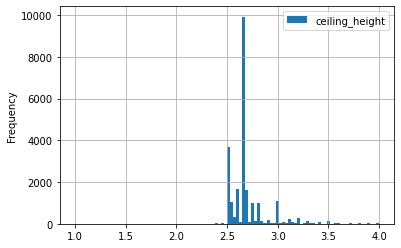

In [21]:
data.plot(y='ceiling_height', kind='hist', bins=100, grid=True, range=(1, 4))
data['ceiling_height'].describe()

Обычно потолки находятся в пределах от 2,1 до 4 метров. Все остальные значения необходимо будет отбросить

count    23571.000000
mean         2.691524
std          0.197299
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

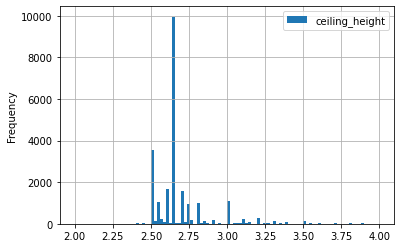

In [22]:
new_data = data.query('ceiling_height > 2.1 and ceiling_height < 4')
new_data.plot(y='ceiling_height', kind='hist', bins=100, grid=True, range=(2, 4))
new_data['ceiling_height'].describe()

Теперь данные больше похожи на адекватные

#### Обработаем аномальные значения в столбце last_price

Также начнем с рассмотрения распределения значений, а также функции describe

count    2.357100e+04
mean     6.472515e+06
std      1.067998e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.626540e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

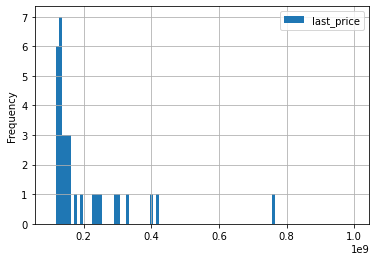

In [23]:
new_data.plot(y='last_price', kind='hist', bins=100, grid=True, range=(100000000,1000000000))
new_data['last_price'].describe()

Маловероятно, что квартира может стоит менее 100.000 рублей, уберем такое объявление. Также обозначим верхнюю планку в виде 200000000.

In [24]:
new_data = new_data.query('last_price > 400000 and last_price < 200000000')

count    2.356100e+04
mean     6.338657e+06
std      7.588102e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.620000e+06
75%      6.750000e+06
max      1.908700e+08
Name: last_price, dtype: float64

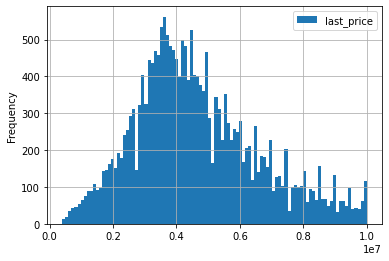

In [25]:
new_data.plot(y='last_price', kind='hist', bins=100, grid=True, range=(400000,10000000))
new_data['last_price'].describe()

Теперь выглядит более правдоподобно.

#### Обрботаем аномальные значения в столбцах living_area, kitchen_area и total_area.

Для начала необходимо убрать все значения, где сумма living_area и kitchen_area будут больше чем total_area

In [26]:
new_data = new_data.query('(living_area + kitchen_area) < total_area')

count    23364.000000
mean        60.028220
std         33.892268
min         13.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        631.200000
Name: total_area, dtype: float64

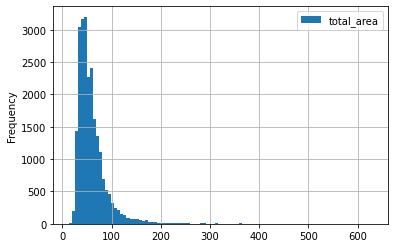

In [27]:
new_data.plot(y='total_area', kind='hist', bins=100, grid=True)
new_data['total_area'].describe()

Общая площадь квартиры 600 квадратных метров звучит привлекательно, но маловероятно, что это соответствует адекватным данным. Поставим верхнюю границу квартиры в 300 квадратных метров

In [28]:
new_data = new_data.query('total_area < 300')

#### Обработаем столбец rooms

count    23313.000000
mean         2.058851
std          1.039567
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

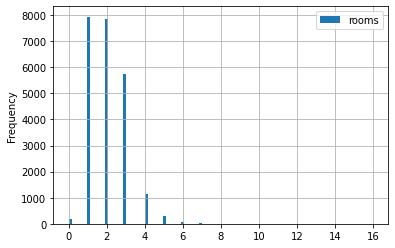

In [29]:
new_data.plot(y='rooms', kind='hist', bins=100, grid=True)
new_data['rooms'].describe()

In [30]:
new_data = new_data.query('rooms <= 8')

Проверим, сколько же данных мы потеряли после всех обработок

In [31]:
new_data.shape[0] / data.shape[0]

0.9832482383222921

Видим, что было убрано не более 5% данных, что нас вполне устраивает.

#### Вывод:
В ходе выполнения предобработки данных были удалены пропуски во всех столбцах, кроме cityCenters_nearest, а также days_exposition. В связи с тем, что обработка первого столбца невозможна из-за отсутсвия возможных адекватных замен, а во втором стобце отсутствие значения означает, что объявление еще не снято.
Также привели типы данных в столбцах:
- total_images
- floors_total
- balcony
- days_exposition
- first_day_exposition
- parks_around3000
- ponds_around3000

Также названия в locality_name были приведены к единому виду.
Также были обработаны аномальные значения в столбцах:
- total_area
- rooms
- ceiling_height
- last_price

### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра

In [32]:
new_data['price_per_sqm'] = new_data['last_price'] / new_data['total_area']

День публикации объявления

In [33]:
new_data['weekday'] = new_data['first_day_exposition'].dt.weekday
new_data['month'] = new_data['first_day_exposition'].dt.month
new_data['year'] = new_data['first_day_exposition'].dt.year

Этаж квартиры

In [34]:
def categorize_floor (row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [35]:
new_data['categorized_floor'] = new_data.apply(categorize_floor, axis=1)


Расстояние в км до центра города

In [36]:
new_data['cityCenters_nearest_km'] = new_data['cityCenters_nearest'] / 1000
new_data['cityCenters_nearest_km'] = new_data['cityCenters_nearest'].round()
display(new_data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,categorized_floor,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16028.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,0,0.0,81.0,82920.792079,1,12,2018,первый,18603.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,13933.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.0,9,False,...,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой,6800.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3,381.0,NaN,72490.845228,1,3,2017,другой,4232.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,0.0,0,0.0,45.0,52542.372881,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,0.0,0,0.0,NaN,44091.710758,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,43.0,12,False,...,173.0,3,196.0,602.0,149511.400651,1,3,2017,другой,10364.0


### Проведите исследовательский анализ данных

Изучим и опишем следующие параметры: 
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

Рассмотрим общую площадь.

count    23302.000000
mean        59.224739
std         29.754737
min         13.000000
25%         40.000000
50%         52.000000
75%         69.197500
max        297.500000
Name: total_area, dtype: float64

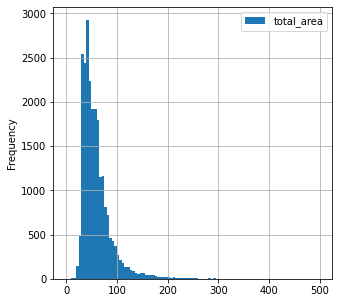

In [37]:
new_data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(5,5), range = (0,500))
new_data['total_area'].describe()

Распределение нормальное, однако есть некоторые выбросы.

Далее рассмотрим жилую площадь.

count    23302.000000
mean        33.805229
std         19.158655
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        250.000000
Name: living_area, dtype: float64

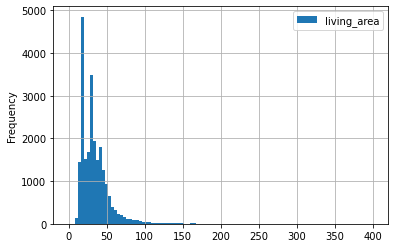

In [38]:
new_data.plot(y='living_area', kind='hist', bins=100, grid=True, range=(0,400))
new_data['living_area'].describe()

Рассмотрим площадь кухни

count    23302.000000
mean        10.427802
std          5.605984
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

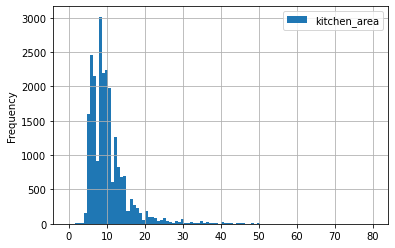

In [39]:
new_data.plot(y='kitchen_area', kind='hist', bins=100, grid=True, range=(0,80))
new_data['kitchen_area'].describe()

Распределение выглядит лучше, чем у жилой площади, однако опять же присутствует пик низких значений.

Рассмотрим цену объекта

count    2.330200e+04
mean     6.205393e+06
std      6.788152e+06
min      4.300000e+05
25%      3.405250e+06
50%      4.600000e+06
75%      6.700000e+06
max      1.908700e+08
Name: last_price, dtype: float64

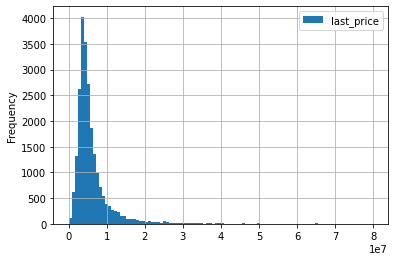

In [40]:
new_data.plot(y='last_price', kind='hist', bins=100, grid=True, range=(0, 80000000))
new_data['last_price'].describe()

Вполне нормальное распределение.

Рассмотрим количество комнат

count    23302.000000
mean         2.054759
std          1.021509
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

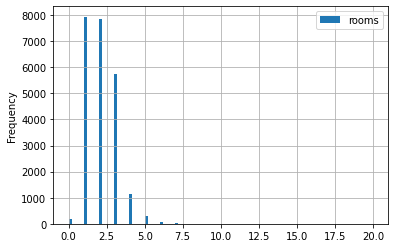

In [41]:
new_data.plot(y='rooms', kind='hist', bins=100, grid=True, range=(0, 20))
new_data['rooms'].describe()

Квартиры с нулевым количеством комнат в теории должны явлсять студиями. Проверим это.

In [42]:
display(new_data.query('rooms == 0')['studio'])

144       True
349      False
508      False
608       True
697       True
         ...  
23210     True
23442    False
23554     True
23592    False
23637     True
Name: studio, Length: 173, dtype: bool

Видим, что это не всегда так, исправим это.

In [43]:
new_data.loc[new_data['rooms'] == 0, 'studio'] = True
display(new_data.query('rooms == 0')['studio'])

144      True
349      True
508      True
608      True
697      True
         ... 
23210    True
23442    True
23554    True
23592    True
23637    True
Name: studio, Length: 173, dtype: bool

Рассмотрим высоту потолков

count    23302.000000
mean         2.690199
std          0.194905
min          2.250000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

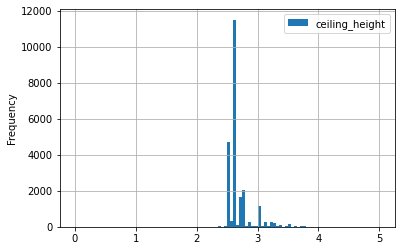

In [44]:
new_data.plot(y='ceiling_height', kind='hist', bins=100, grid=True, range=(0, 5))
new_data['ceiling_height'].describe()

В данном столбце было пропущено большое количество значений, поэтому подобное распределение вполне ожидаемо.

Рассмотрим этаж квартиры

count    23302.000000
mean         5.897520
std          4.883727
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

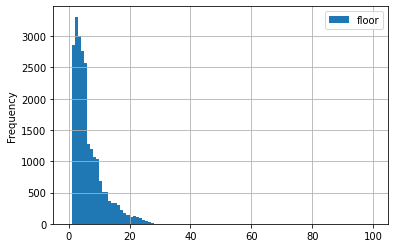

In [45]:
new_data.plot(y='floor', kind='hist', bins=100, grid=True, range=(0, 100))
new_data['floor'].describe()

Тоже вполне ожидемый вид распределения значений.

Рассмотрим тип этажа квартиры

<AxesSubplot:>

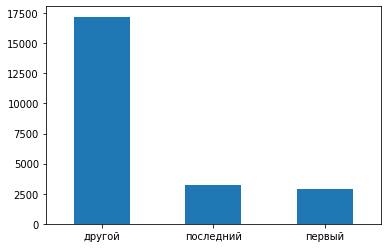

In [46]:
new_data['categorized_floor'].value_counts().plot.bar(rot=0)

Получаем примерно одинаковое количество квартир с первым и последним этажом, а также большое количество квартир с иными этажами.

Рассмотрим общее количество этаже в доме

count    23302.000000
mean        10.689984
std          6.575162
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

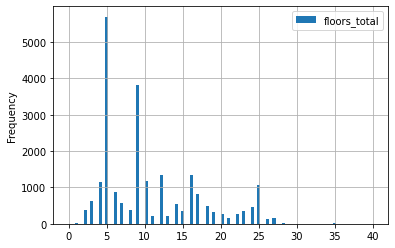

In [47]:
new_data.plot(y='floors_total', kind='hist', bins=100, grid=True, range=(0, 40))
new_data['floors_total'].describe()

Видим большие выбросы, однако же в ситуации с общим количеством этажей в домах это вполне нормально.

Рассмотрим расстояние до центра города в метрах

count    17880.000000
mean     14263.767506
std       8599.537244
min        181.000000
25%       9380.000000
50%      13145.000000
75%      16333.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

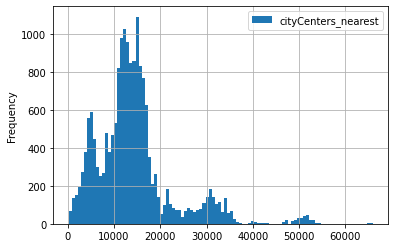

In [48]:
new_data.plot(y='cityCenters_nearest', kind='hist', bins=100, grid=True)
new_data['cityCenters_nearest'].describe()

Помним, что большое количество исходных данных в данном столбце имеет пропущенные значения, поэтому объективность полученного распределения распознать сложно.

Рассмотрим расстояние до ближайшего до аэропорта

count    23302.000000
mean     22096.738048
std      16482.708247
min          0.000000
25%      10248.000000
50%      21858.500000
75%      34477.000000
max      84869.000000
Name: airports_nearest, dtype: float64

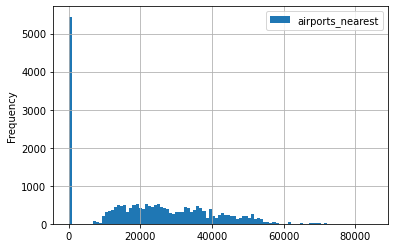

In [49]:
new_data.plot(y='airports_nearest', kind='hist', bins=100, grid=True)
new_data['airports_nearest'].describe()

Пик в 0 результат предобработки данных, который мы не смогли решить иным способом. Явные проблемы в исходных данных.

Посмотрим на данные без этой предобработки

count    17859.000000
mean     28831.300185
std      12661.310292
min       6450.000000
25%      18551.000000
50%      26791.000000
75%      37348.000000
max      84869.000000
Name: airports_nearest, dtype: float64

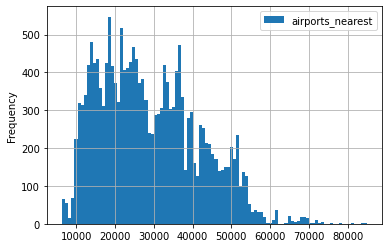

In [50]:
good_airport = new_data.query('airports_nearest > 0')
good_airport.plot(y='airports_nearest', kind='hist', bins=100, grid=True)
good_airport['airports_nearest'].describe()

Рассмотрим расстояние до ближайшего парка

count    23302.000000
mean       166.809973
std        306.804665
min          0.000000
25%          0.000000
50%          0.000000
75%        299.750000
max       3190.000000
Name: parks_nearest, dtype: float64

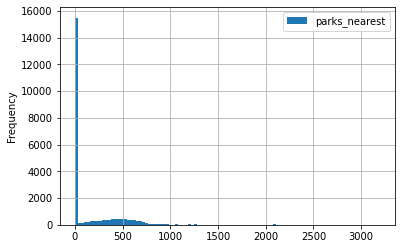

In [51]:
new_data.plot(y='parks_nearest', kind='hist', bins=100, grid=True)
new_data['parks_nearest'].describe()

count    7906.000000
mean      491.652669
std       343.114564
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

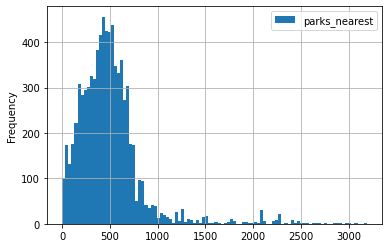

In [52]:
good_parks = new_data.query('parks_nearest > 0')
good_parks.plot(y='parks_nearest', kind='hist', bins=100, grid=True)
good_parks['parks_nearest'].describe()

Рассмотрим день публикации объявления

count    23302.000000
mean         2.568277
std          1.788730
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

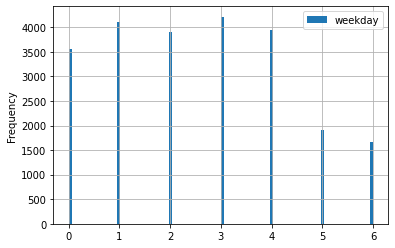

In [53]:
new_data.plot(y='weekday', kind='hist', bins=100, grid=True)
new_data['weekday'].describe()

Видим, что самое большое количество объявлений публикуется в середине недели

Рассмотрим распределение по месяцам

count    23302.000000
mean         6.396962
std          3.491571
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

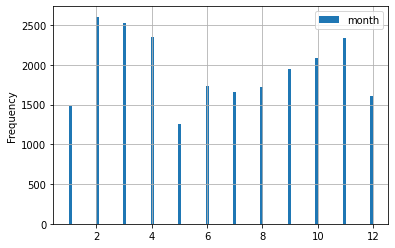

In [54]:
new_data.plot(y='month', kind='hist', bins=100, grid=True)
new_data['month'].describe()

Можем заметить, что самое низкое количество объявлений было в мае, а после росло с неболшим падением в июле вплоть до ноября. Где ожидаемо упало в декабре в связи с наступлением всевозможных новогодних праздников.

Изучим, как быстро продавались квартиры (столбец days_exposition)

count    20193.000000
mean       180.607735
std        219.339572
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

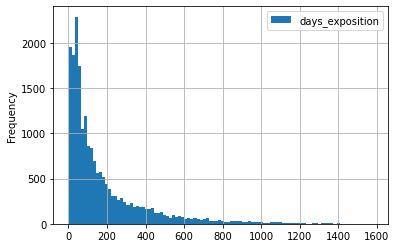

In [55]:
new_data.plot(y='days_exposition', kind='hist', bins=100, grid=True)
new_data['days_exposition'].describe()

Среднее арифмитическое равно 180.61
Медианное значение равно 95
В связи с пиками в данных будем ориентироваться на медианное значение, которое отражает действительное вермя продажи квартиры.
Получаем, что в основном квартиры продавались за 95 дней. Соответственно будем считать, что те, которые продаются дольше чем 95 дней - долгой продажой, а те, которые продаются быстрее, чем за 95 дней - быстрой продажой.

#### Изучим влияние факторов на цену продажи

Начнем изучение с общей площади, а еще лучше рассмотрим корреляцию общей площади к цене за один квадратный метр

0.27676191536427813


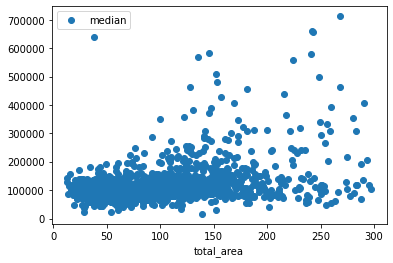

In [56]:
price_area_pivot = new_data.pivot_table(index='total_area', values='price_per_sqm', aggfunc='median')
price_area_pivot.columns = ['median']
price_area_pivot.plot(y='median', style='o')
print(new_data['total_area'].corr(new_data['price_per_sqm']))

Очень слабое влияние, перейдем к рассмотрению жилой площади

0.18593175386599498


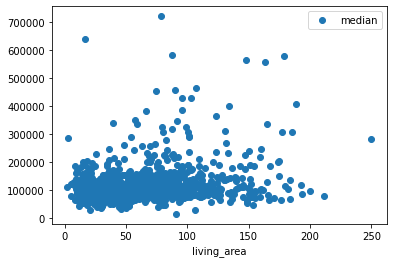

In [57]:
price_living_pivot = new_data.pivot_table(index='living_area', values='price_per_sqm', aggfunc='median')
price_living_pivot.columns = ['median']
price_living_pivot.plot(y='median', style='o')
print(new_data['living_area'].corr(new_data['price_per_sqm']))

Ещё слабее, чем для общей площади. Перейдем к площади кухни

0.37558845374398353


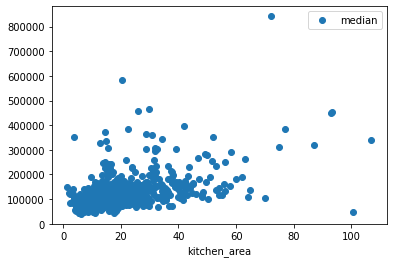

In [58]:
price_kitchen_pivot = new_data.pivot_table(index='kitchen_area', values='price_per_sqm', aggfunc='median')
price_kitchen_pivot.columns = ['median']
price_kitchen_pivot.plot(y='median', style='o')
print(new_data['kitchen_area'].corr(new_data['price_per_sqm']))

На данный момент максимальный результат, однако все же не слишком явная зависимость. Перейдем к количеству комнат

0.02062887100873176


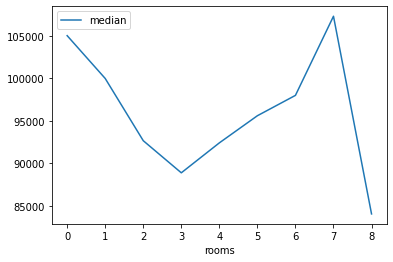

In [59]:
price_rooms_pivot = new_data.pivot_table(index='rooms', values='price_per_sqm', aggfunc='median')
price_rooms_pivot.columns = ['median']
price_rooms_pivot.plot(y='median')
print(new_data['rooms'].corr(new_data['price_per_sqm']))

Чрезвычайно неправдоподобный пик, после которого идет снижение. Корреляция мала, вероятно из-за проблем с данными. Перейдем к типу этажа

<AxesSubplot:xlabel='categorized_floor'>

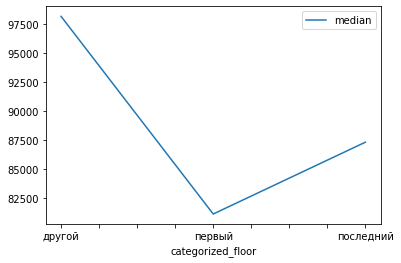

In [60]:
price_floor_pivot = new_data.pivot_table(index = 'categorized_floor', values='price_per_sqm', aggfunc='median')
price_floor_pivot.columns = ['median']
price_floor_pivot.plot(y='median')

Можем сделать вывод, что стоимость квартир на первом этаже, обычно меньше стоимости на последнем, что в принципе похоже на адекватный результат. Перейдем к рассмотрению дня недели, месяца и года

<AxesSubplot:xlabel='weekday'>

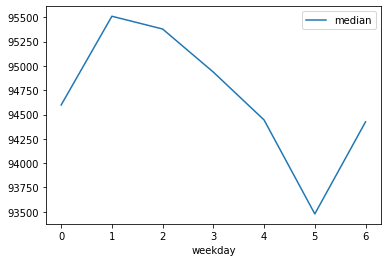

In [61]:
price_floor_pivot = new_data.pivot_table(index = 'weekday', values='price_per_sqm', aggfunc='median')
price_floor_pivot.columns = ['median']
price_floor_pivot.plot(y='median')

<AxesSubplot:xlabel='month'>

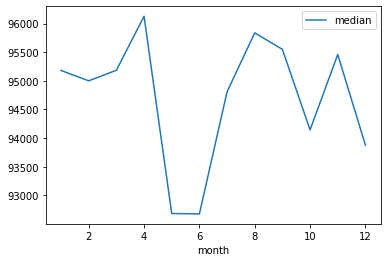

In [62]:
price_floor_pivot = new_data.pivot_table(index = 'month', values='price_per_sqm', aggfunc='median')
price_floor_pivot.columns = ['median']
price_floor_pivot.plot(y='median')

<AxesSubplot:xlabel='year'>

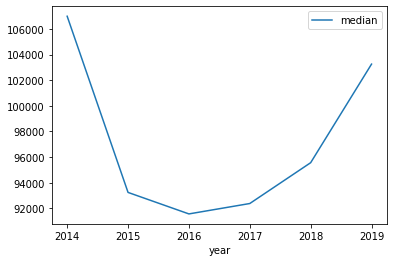

In [63]:
price_floor_pivot = new_data.pivot_table(index = 'year', values='price_per_sqm', aggfunc='median')
price_floor_pivot.columns = ['median']
price_floor_pivot.plot(y='median')

- Стоимость в рабочие дни выше, чем в выходные.
- В середине года стоимость на жилье меньше, чем в остальное время.
- С 2016 года наблюдается положительная тенденция в цене.

#### Изучим среднюю цену в топ-10 по количеству объявлений населенных пунктах.

In [64]:
locality_price = new_data.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['median','count'])
locality_price.columns = ['median', 'count']
locality_price = locality_price.sort_values(by=['count'], ascending=False)
display(locality_price.head(10))

,median,count
locality_name,,
санкт-петербург,104602.510460,15439
мурино,86059.293995,576
кудрово,95675.473579,464
шушары,76747.967480,438
всеволожск,65789.473684,385
пушкин,99993.589744,364
колпино,74723.748474,336
парголово,91579.708641,326
гатчина,67695.961995,301


Ожидаемо видим, что самая высокая стоимость квадратного метра в Санкт-Петербурге, а самая низкая в Выборге.

#### Изучим как же влияет расстояние от центра СПБ на цену квадратного метра

(0.0, 500000.0)

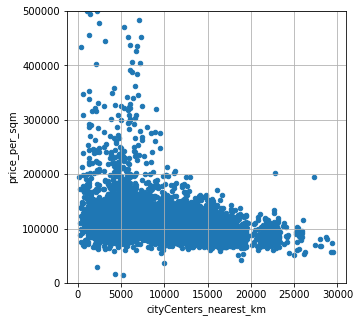

In [65]:
spb_locality = new_data.query('locality_name == "санкт-петербург"')
price_from_center = spb_locality.groupby(['cityCenters_nearest_km'])['price_per_sqm'].median()
price_from_center = price_from_center.to_frame()
price_from_center['cityCenters_nearest_km'] = price_from_center.index
price_from_center.plot.scatter(x='cityCenters_nearest_km', y='price_per_sqm', grid=True, figsize=(5,5))
plt.ylim([0, 500000])

Видим, что чем дальше находится от центра города, тем зачастую меньше стоит квадратный метр.

### Общий вывод

В данной работе была проведена работа с данными сервиса Яндекс Недвижиость - архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населенных пунктах.
Была выполнена предобработка данных, в ходе которой:
- были удалены пропуски в о всех столбцах, кроме cityCenters_nearest, days_exposition;
- были приведены типы данных в столбцах (total_images, floors_total, balcony, days_exposition, first_day_exposition, parks_around3000, ponds_around3000
- были изменены названия в столбце locality_name, дабы привести их к единому виду
- были обработаны аномальные значения в столбцах (total_area, rooms, ceiling_height, last_price)

Были добавлены дополнительные столбцы:
- price_per_sqm - цена за один квадратный метр
- weekday день - недели публикации объявления
- month - месяц публикации объявления
- year - год публикации объявления
- categorized_floor - категории этажности (первый, последний, другой)
- cityCenters_nearest_km - расстояние в км до центра города

Был проведен исследовательский анализ, в ходе которого были рассмотрены следующие пункты:
- Время продажи квартиры, которое в среднем оказалось равно 95 дням.
- Влияние факторов на ценообразование квартиры
- Стоимость квадратного метра в топ-10 по количеству объявлений населенных пунктах, где оказалось, что максмальную цену имеет Санкт-Петербург, а минимальную Выборг
- Изучили влияние расстояние от центр Санкт-Петербурга на цену квадратного метра, что показало нам, что чем дальше от центра, тем в большинстве случаев будет дешевле стоить квартира.